In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Recurrent Neural Network (RNN)



## Data Preprocessing

In [ ]:
dataset_train = pd.read_csv('/content/Google_Stock_Price_Train.csv')
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
train = dataset_train.loc[:, ["Open"]].values
train

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [ ]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
train_scaled = scaler.fit_transform(train)
train_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

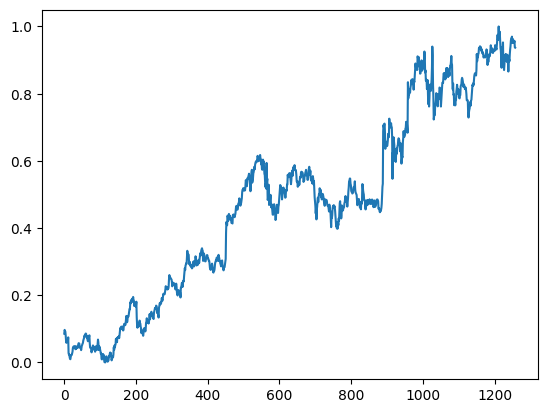

In [ ]:
plt.plot(train_scaled)
plt.show()

In [ ]:
print(len(train_scaled))
print(train_scaled.shape)

1258
(1258, 1)


In [ ]:
# Creating a data structure with 50 timesteps and 1 output
X_train = []
y_train = []
timesteps = 50
for i in range(timesteps, 1258):
    X_train.append(train_scaled[i-timesteps:i, 0])
    y_train.append(train_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)



In [ ]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.03675869],
        [0.04486941],
        [0.05065481]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.04486941],
        [0.05065481],
        [0.05214302]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.05065481],
        [0.05214302],
        [0.05612397]],

       ...,

       [[0.9313937 ],
        [0.94636878],
        [0.96569685],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.94636878],
        [0.96569685],
        [0.97510976],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.96569685],
        [0.97510976],
        [0.95966962],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [ ]:
y_train

array([0.05214302, 0.05612397, 0.05818885, ..., 0.95725128, 0.93796041,
       0.93688146])

## RNN model

In [ ]:
# Import libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# Initializing the RNN
model = Sequential()

# Adding the first RNN layer and some Dropout regularisation
model.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Adding a second RNN layer and some Dropout regularisation
model.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
model.add(Dropout(0.2))

# Adding a third RNN layer and some Dropout regularisation
model.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
model.add(Dropout(0.2))

# Adding a fourth RNN layer and some Dropout regularisation
model.add(SimpleRNN(units = 50))
model.add(Dropout(0.2)) # Avoid overfitting

# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

KeyboardInterrupt: 

## Prediction the test model

In [ ]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('/content/Google_Stock_Price_Test.csv')
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [ ]:
real_stock_price = dataset_test.loc[:, ["Open"]].values
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [ ]:
# Getting the prediction of stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
dataset_total

,Open
0,325.25
1,331.27
2,329.83
3,328.34
4,322.04
...,...
15,829.62
16,837.81
17,834.71
18,814.66


In [ ]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - timesteps:].values.reshape(-1,1) # Reshapes the 1D Numpy array into a 2D array
inputs = scaler.transform(inputs)  # min max scaler
inputs

array([[0.97510976],
       [0.95966962],
       [0.97808617],
       [1.        ],
       [0.98076494],
       [0.97083116],
       [0.98450406],
       [0.96054394],
       [0.9371419 ],
       [0.92841729],
       [0.90804747],
       [0.8771858 ],
       [0.92153434],
       [0.93809063],
       [0.93165414],
       [0.95254483],
       [0.88812412],
       [0.88637547],
       [0.87032145],
       [0.88563137],
       [0.90743359],
       [0.91571173],
       [0.89941588],
       [0.91805566],
       [0.9089404 ],
       [0.9024853 ],
       [0.89456061],
       [0.91600938],
       [0.9132934 ],
       [0.88979835],
       [0.86589404],
       [0.89030062],
       [0.90335962],
       [0.89642086],
       [0.91777662],
       [0.93176576],
       [0.94114145],
       [0.95762334],
       [0.96413424],
       [0.96402262],
       [0.96971501],
       [0.95077759],
       [0.96294367],
       [0.96123223],
       [0.95475854],
       [0.95204256],
       [0.95163331],
       [0.957

## Visualization

In [ ]:
X_test = []
for i in range(timesteps, 70):
  X_test.append(inputs[i - timesteps:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

# Visualizing Results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

NameError: name 'model' is not defined

# Long Short-Term Memory (LSTM)

In [ ]:
data_train = pd.read_csv('/content/Google_Stock_Price_Train.csv')
data_test = pd.read_csv('/content/Google_Stock_Price_Test.csv')


## Data Preprocessing

In [ ]:
train_set = data_train.loc[:, ["Open"]].values
train_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [ ]:
# Feature Scaling
minmax_scale = MinMaxScaler(feature_range=(0,1))
train_set_scaled = minmax_scale.fit_transform(train_set)
train_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [ ]:
# Create sequences with lockback windown
X_train = []
y_train = []
timesteps = 50

for i in range(timesteps, 1258):
    X_train.append(train_set_scaled[i-timesteps:i, 0])
    y_train.append(train_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
# Reshape to 3D: (samples, timesteps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.03675869],
        [0.04486941],
        [0.05065481]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.04486941],
        [0.05065481],
        [0.05214302]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.05065481],
        [0.05214302],
        [0.05612397]],

       ...,

       [[0.9313937 ],
        [0.94636878],
        [0.96569685],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.94636878],
        [0.96569685],
        [0.97510976],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.96569685],
        [0.97510976],
        [0.95966962],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

## LSTM Model

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
# Let's create a dummy model_lstm to make predictions
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(units=50, return_sequences=False))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(units=1))

# Compile the model_lstm
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Train model_lstm
print("Training the model_lstm...")
history = model_lstm.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)


Training the model_lstm...
Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0608 - val_loss: 0.0015
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0050 - val_loss: 0.0019
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0041 - val_loss: 0.0026
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0033 - val_loss: 0.0015
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0027 - val_loss: 0.0033
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0032 - val_loss: 0.0018
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0032 - val_loss: 0.0017
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0026 - val_loss: 0.0015
Epoch 9/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0027 - val_loss: 0.0080
Epoch 10/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0034 - val_loss: 0.0014
Epoch 11/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0026 - val_loss: 0.0012
Epoch 12/100
31/31 ━━━━━━━

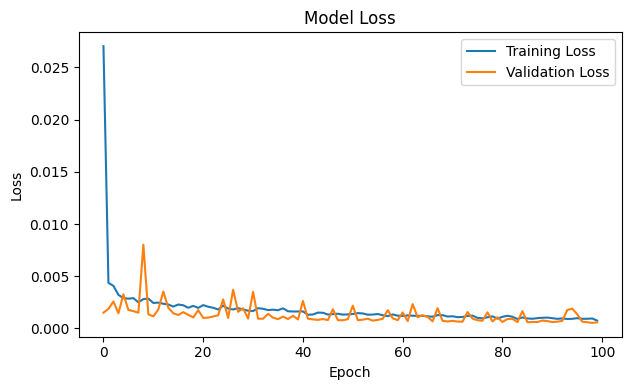

In [ ]:
# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Prediction the test model

In [ ]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('/content/Google_Stock_Price_Test.csv')
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [ ]:
real_stock_price = dataset_test.loc[:, ["Open"]].values
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [ ]:
# Getting the predidtion of stock in 2017
dataset_total = pd.concat((data_train['Open'], data_test['Open']), axis = 0)
dataset_total


,Open
0,325.25
1,331.27
2,329.83
3,328.34
4,322.04
...,...
15,829.62
16,837.81
17,834.71
18,814.66


In [ ]:
inputs_lstm = dataset_total[len(dataset_total) - len(dataset_test) - timesteps:].values.reshape(-1,1) # Reshapes the 1D Numpy array into a 2D array
inputs_lstm = scaler.transform(inputs_lstm)  # min max scaler
inputs_lstm

array([[0.97510976],
       [0.95966962],
       [0.97808617],
       [1.        ],
       [0.98076494],
       [0.97083116],
       [0.98450406],
       [0.96054394],
       [0.9371419 ],
       [0.92841729],
       [0.90804747],
       [0.8771858 ],
       [0.92153434],
       [0.93809063],
       [0.93165414],
       [0.95254483],
       [0.88812412],
       [0.88637547],
       [0.87032145],
       [0.88563137],
       [0.90743359],
       [0.91571173],
       [0.89941588],
       [0.91805566],
       [0.9089404 ],
       [0.9024853 ],
       [0.89456061],
       [0.91600938],
       [0.9132934 ],
       [0.88979835],
       [0.86589404],
       [0.89030062],
       [0.90335962],
       [0.89642086],
       [0.91777662],
       [0.93176576],
       [0.94114145],
       [0.95762334],
       [0.96413424],
       [0.96402262],
       [0.96971501],
       [0.95077759],
       [0.96294367],
       [0.96123223],
       [0.95475854],
       [0.95204256],
       [0.95163331],
       [0.957

In [ ]:
X_test = []
for i in range(timesteps, len(inputs_lstm)):
  X_test.append(inputs_lstm[i - timesteps:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Making predictions
predicted_stock_price = model_lstm.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


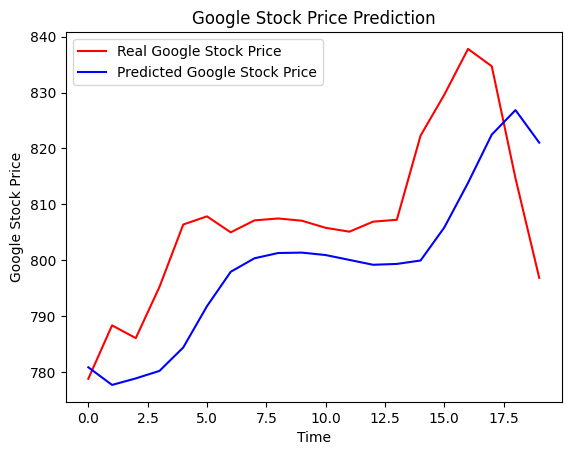

In [ ]:
# Visualizing Results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()


# Ploty with Zoom In/Out

In [ ]:
!pip -q install plotly ipywidgets

In [ ]:
from google.colab import output
output.enable_custom_widget_manager() # This enable will make ipywidgets work nicely
import plotly.graph_objects as go
import ipywidgets as widgets

In [ ]:
# Ensure proper dtypes and tidy ordering
data_train["Date"] = pd.to_datetime(data_train["Date"], errors="coerce")
data_train["Open"] = pd.to_numeric(data_train["Open"], errors="coerce")

# Drop bad rows, sort, reset index
data_train = data_train.dropna(subset=["Date", "Open"]).sort_values("Date").reset_index(drop=True)

# Optional: ensure business-day cadence and fill gaps (safer for markets)
bidx = pd.date_range(data_train["Date"].min(), data_train["Date"].max(), freq="B")
data_train = (data_train
              .set_index("Date")
              .reindex(bidx))
data_train["Open"] = data_train["Open"].ffill().bfill()
data_train = data_train.rename_axis("Date").reset_index()

# Final sanity check
assert data_train["Date"].notna().all() and data_train["Open"].notna().all()
print("✅ Data ready. Rows:", len(data_train))


✅ Data ready. Rows: 1304


In [ ]:
try:
    scaler_y  # if you created it during training
except NameError:
    from sklearn.preprocessing import MinMaxScaler
    scaler_y = MinMaxScaler().fit(data_train["Open"].values.reshape(-1,1))


## Choose model

In [ ]:
model = model_lstm # should display a Keras model summary repr

lookback = model.input_shape[1]
n_features = model.input_shape[2]
assert n_features == 1, "This block assumes a univariate model (only 'Open'). If multivariate, see notes below."
print("lookback:", lookback, "  n_features:", n_features)

lookback: 50   n_features: 1


In [ ]:
def _last_lookback_window_univariate(series: pd.Series):
    """Scale 'Open' and return last (1, lookback, 1) window."""
    scaled = scaler_y.transform(series.values.reshape(-1,1))
    return scaled[-lookback:].reshape(1, lookback, 1)

def forecast_next_open(n_days: int) -> pd.DataFrame:
    """
    Iterative one-step-ahead forecast of Open for next n_days (business days).
    Returns DataFrame with Date, Predicted (in original price units).
    """
    # Future dates (business days)
    # Take the last days
    # Create future business days (except weekend)
    last_date = data_train["Date"].max()
    future_dates = pd.date_range(last_date + pd.Timedelta(days=1), periods=n_days, freq="B")

    # Seed window from the last lookback Open prices
    window = _last_lookback_window_univariate(data_train["Open"])

    preds_scaled = []
    for _ in range(n_days):
      # Predict the next days with the scaled of Open Price (1, 1)
        yhat_scaled = model.predict(window, verbose=0)  # (1,1)
        preds_scaled.append(yhat_scaled[0,0])
        # roll window forward and append the new prediction
        window = np.concatenate([window[:,1:,:], yhat_scaled.reshape(1,1,1)], axis=1)
    # Scaled all the prediction into [0, 1] shapes
    # use inverse_transform to map them back to the Original Price Sale
    preds = scaler_y.inverse_transform(np.array(preds_scaled).reshape(-1,1)).ravel()
    return pd.DataFrame({"Date": future_dates, "Predicted": preds})


## Ploty with Silder

In [ ]:
slider = widgets.IntSlider(value=7, min=1, max=30, step=1, description="Days:")
output_box = widgets.Output()

def plot_open_with_slider(n_days: int):
    with output_box:
        output_box.clear_output(wait=True)
        fut = forecast_next_open(n_days)

        fig = go.Figure()
        # history (Open)
        fig.add_trace(go.Scatter(
            x=data_train["Date"], y=data_train["Open"],
            name="History (Open)", mode="lines"))

        # forecast line
        fig.add_trace(go.Scatter(
            x=fut["Date"], y=fut["Predicted"],
            name=f"Forecast +{n_days}d", mode="lines+markers"))

        # Vertical boundary as shape (avoids datetime annotation bugs)
        cutoff_dt = pd.to_datetime(data_train["Date"].max()).to_pydatetime()
        fig.add_shape(type="line", x0=cutoff_dt, x1=cutoff_dt, y0=0, y1=1,
                      xref="x", yref="paper", line=dict(dash="dot"))
        fig.add_annotation(x=cutoff_dt, y=1, xref="x", yref="paper",
                           text="Forecast start", showarrow=False, yshift=10)

        fig.update_layout(
            title=f"Open price forecast: next {n_days} business days",
            xaxis_title="Date", yaxis_title="Open Price",
            legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
            margin=dict(l=0, r=0, t=60, b=0),
        )
        fig.update_xaxes(type="date")
        fig.show()

widgets.interact(plot_open_with_slider, n_days=slider)
display(output_box)


interactive(children=(IntSlider(value=7, description='Days:', max=30, min=1), Output()), _dom_classes=('widget…

Output()

# Monte Carlo Dropout


## CI (confidence interval): uncertainty of the mean line itself. Narrower.

##  PI (prediction interval): uncertainty of the actual future value (mean + randomness/volatility). Wider. => Recommended in Stock

In [ ]:
# Confidence Interval ( CI )
# Prediction Interval ( PI )
def forecast_open_mc_dropout(n_days: int, T: int = 100, conf: float = 0.95):
    """
    Monte Carlo Dropout iterative forecast.
    Returns DataFrame with Date, Mean, CI_Lower, CI_Upper, PI_Lower, PI_Upper.
    """
    # future dates
    last_date = data_train["Date"].max()
    future_dates = pd.date_range(last_date + pd.Timedelta(days=1), periods=n_days, freq="B")

    # seed window
    def seed():
        scaled = scaler_y.transform(data_train["Open"].values.reshape(-1,1))
        return scaled[-lookback:].reshape(1, lookback, 1)

    # T stochastic path (Dropout activate)
    paths_scaled = []
    for _ in range(T):
        w = seed()
        seq = []
        for _ in range(n_days):
            # IMPORTANT: call the model with training=True to keep dropout on
            yhat_scaled = model(w, training=True).numpy()   # shape (1,1)
            seq.append(yhat_scaled[0,0])
            w = np.concatenate([w[:,1:,:], yhat_scaled.reshape(1,1,1)], axis=1)
        paths_scaled.append(seq)

    paths_scaled = np.array(paths_scaled)           # (T, n_days)
    # inverse transform each path to price units
    paths = scaler_y.inverse_transform(paths_scaled.reshape(-1,1)).reshape(T, n_days)

    # Statistics per horizon
    mean = paths.mean(axis=0)
    std = paths.std(axis=0)

    # 95% CI for the mean prediction at each horizon
    z = 1.96 # for 95% of data lies with +-1.96 standard normal distribution
    ci_lower = mean - z * (std / np.sqrt(T))
    ci_upper = mean + z * (std / np.sqrt(T))

    # 95% PI for individual outcomes — percentile-based across paths
    # 95% Prediction Interval
    pi_lower = np.percentile(paths, 2.5, axis=0)
    pi_upper = np.percentile(paths, 97.5, axis=0)

    return pd.DataFrame({
        "Date": future_dates,
        "Mean": mean,
        "CI_Lower": ci_lower, "CI_Upper": ci_upper,
        "PI_Lower": pi_lower, "PI_Upper": pi_upper
    })


In [ ]:
# ------- Widgets & Plot --------
days_slider = widgets.IntSlider(value=7, min=1, max=30, step=1, description="Days:")
# Prediction the possible futures between 100 and 300
T_slider    = widgets.IntSlider(value=100, min=20, max=150, step=20, description="MC runs:")
conf_dd     = widgets.Dropdown(
    options=[("80%",0.80),("90%",0.90),("95%",0.95),("99%",0.99)],
    value=0.95, description="Confidence:"
)
output_box  = widgets.Output()

## Plot with CI and PI

In [ ]:
def plot_open_mc(n_days: int, T: int, conf: float):
    with output_box:
        output_box.clear_output(wait=True)
        fut = forecast_open_mc_dropout(n_days=n_days, T=T, conf=conf)

        # --- PLOT ---
        fig = go.Figure()
        # history
        fig.add_trace(go.Scatter(x=data_train["Date"], y=data_train["Open"],
                                 name="History (Open)", mode="lines"))
        # mean line
        fig.add_trace(go.Scatter(x=fut["Date"], y=fut["Mean"],
                                 name=f"Mean forecast (+{n_days}d)", mode="lines+markers"))

        # CI band (mean uncertainty) – usually narrow
        fig.add_trace(go.Scatter(
            x=fut["Date"], y=fut["CI_Upper"],
            mode="lines", line=dict(width=0),  # invisible line
            showlegend=False
        ))
        fig.add_trace(go.Scatter(
            x=fut["Date"], y=fut["CI_Lower"],
            name=f"{int(conf*100)}% CI (mean)",
            mode="lines", line=dict(width=0),
            fill="tonexty", fillcolor="rgba(200,100,255,0.3)"  # purple shade
        ))

        # PI band (actuals uncertainty) – wider
        fig.add_trace(go.Scatter(
            x=fut["Date"], y=fut["PI_Upper"],
            mode="lines", line=dict(width=0),
            showlegend=False
        ))
        fig.add_trace(go.Scatter(
            x=fut["Date"], y=fut["PI_Lower"],
            name=f"{int(conf*100)}% PI (actual)",
            mode="lines", line=dict(width=0),
            fill="tonexty", fillcolor="rgba(100,200,255,0.3)"  # blue shade
        ))

        # Forecast boundary (robust datetime method)
        cutoff_dt = pd.to_datetime(data_train["Date"].max()).to_pydatetime()
        fig.add_shape(type="line", x0=cutoff_dt, x1=cutoff_dt, y0=0, y1=1,
                      xref="x", yref="paper", line=dict(dash="dot"))
        fig.add_annotation(x=cutoff_dt, y=1, xref="x", yref="paper",
                           text="Forecast start", showarrow=False, yshift=10)

        fig.update_layout(
            title=f"Open forecast with CI & PI (MC Dropout, T={T}, {int(conf*100)}%)",
            xaxis_title="Date", yaxis_title="Open Price",
            legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
            margin=dict(l=0, r=0, t=60, b=0),
        )
        fig.update_xaxes(type="date")
        fig.show()

ui = widgets.VBox([days_slider, T_slider, conf_dd])
out = widgets.interactive_output(plot_open_mc, {"n_days": days_slider, "T": T_slider, "conf": conf_dd})

display(ui, output_box)

Output()